<a href="https://colab.research.google.com/github/bkleck/WaterAnalytics/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Importing Datasets and Libraries

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
cd /content/gdrive/MyDrive/Surface Water Hydrology

/content/gdrive/MyDrive/Surface Water Hydrology


In [3]:
import pandas as pd
from datetime import datetime, date 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2) EDA for Aquifer Petrignano

In [4]:
# start off with Petriganano as it has the least number of features, easier to clean
df = pd.read_csv('data/Aquifer_Petrignano.csv')
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [5]:
# rename columns for easier manipulation
df.columns = ['date', 'rainfall', 'depth_p24', 'depth_p25', 'temp_umbra', 'temp_petri', 'volume', 'hydrometry']
df.head()

,date,rainfall,depth_p24,depth_p25,temp_umbra,temp_petri,volume,hydrometry
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [6]:
# for time-series analysis, we have to convert our date column into datetime format
df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')

# we also sort our dataset in chronological order for further time-series analysis later
df = df.sort_values(by='date')
df.head()

,date,rainfall,depth_p24,depth_p25,temp_umbra,temp_petri,volume,hydrometry
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


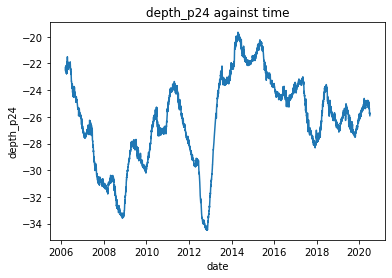

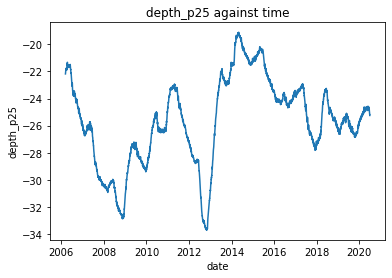

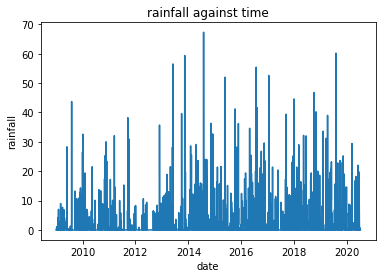

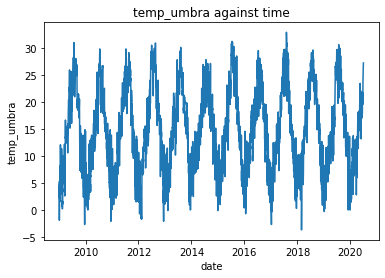

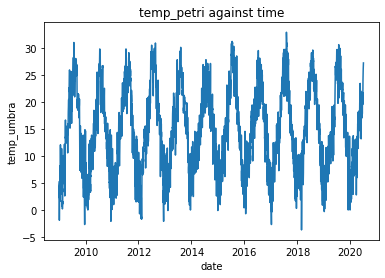

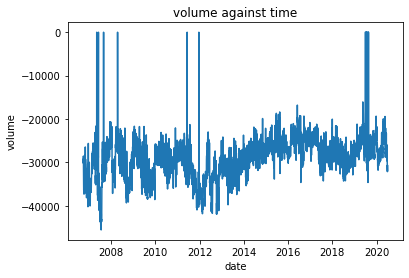

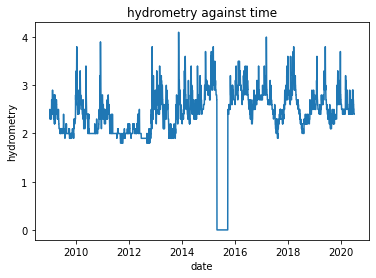

In [7]:
#depth_p24 against time lineplot
sns.lineplot(x="date",y="depth_p24",data= df)
plt.title('depth_p24 against time')
plt.show()

#depth_p25 against time lineplot
sns.lineplot(x="date",y="depth_p25",data= df)
plt.title('depth_p25 against time')
plt.show()

#rainfall against time lineplot
sns.lineplot(x="date",y="rainfall",data= df)
plt.title('rainfall against time')
plt.show()

#temp_umbra against time lineplot
sns.lineplot(x="date",y="temp_umbra",data= df)
plt.title('temp_umbra against time')
plt.show()

#temp_petri against time lineplot
sns.lineplot(x="date",y="temp_umbra",data= df)
plt.title('temp_petri against time')
plt.show()

#volume against time lineplot
sns.lineplot(x="date",y="volume",data= df)
plt.title('volume against time')
plt.show()

#hydrometry against time lineplot
sns.lineplot(x="date",y="hydrometry",data= df)
plt.title('hydrometry against time')
plt.show()

Based on the plots seen above, we see that the features depth_p24 and depth_p25 have a similar lineplot and values, hence we will drop depth_p24 and use depth_p25 as the target variable.

Similarly, temp_umbra and temp_petri have similar lineplot, hence we will drop temp_umbra and use temp_petri as the target variable.

Furthermore, as we can see from the depth against time plot and the rainfall against time plot, we have a correlation where a higher rainfall results in a deeper water body.

In [8]:
df = df.drop(['depth_p24','temp_petri'],axis=1)
df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry
0,2006-03-14,NaN,-22.18,NaN,NaN,NaN
1,2006-03-15,NaN,-22.14,NaN,NaN,NaN
2,2006-03-16,NaN,-22.04,NaN,NaN,NaN
3,2006-03-17,NaN,-22.04,NaN,NaN,NaN
4,2006-03-18,NaN,-22.04,NaN,NaN,NaN


As seen from the plots above, the target variable (Depth to Groundwater) contains data since 2006, but the feature variables mostly only contain data from 2009 onwards, hence we will drop all data before 2009 to remove these NaNs that would affect our model performance negatively.

In [9]:
# drop rows before 2009 as they contain mostly NaN values
df = df[~(df['date'] < '2009-01-01')]
df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry
1024,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1025,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
1026,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
1027,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
1028,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


# 3) Data Cleaning

For time-series data, they have to be equidistant in order for proper analysis to be done. Hence, we will take check the difference between each row of data.

In [10]:
# take the difference by a shift of 1
df['shift'] = df['date'] - df['date'].shift(1)
df[['date', 'shift']].head()

,date,shift
1024,2009-01-01,NaT
1025,2009-01-02,1 days
1026,2009-01-03,1 days
1027,2009-01-04,1 days
1028,2009-01-05,1 days


In [11]:
df['shift'].sum(), df['shift'].count()

(Timedelta('4198 days 00:00:00'), 4198)

Since the sum equates to the count, it means that each row differs by 1 day, hence it is an equidistant time series data, and no further processing is required.

In [12]:
df.drop('shift', axis=1, inplace=True)
df.head()

,date,rainfall,depth_p25,temp_umbra,volume,hydrometry
1024,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1025,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
1026,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
1027,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
1028,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


Now, we will try to deal with the NaNs and 0s left in our dataset. We have to find ways to replace their values, or else the machine learning models would not be able to interpret them correctly, affecting our results.

In [13]:
df.isna().sum()

date           0
rainfall       0
depth_p25     27
temp_umbra     0
volume         1
hydrometry     0
dtype: int64

In [14]:
(df == 0).astype(int).sum(axis=0)

date             0
rainfall      3147
depth_p25        0
temp_umbra       7
volume          25
hydrometry     150
dtype: int64

From the sums above, as well as the individual line plots during our EDA, we can tell that there are many 0s in volume and hydrometry that look like errors in the data, hence we will convert them into NaNs instead for further processing.

Text(0, 0.5, 'Drainage')

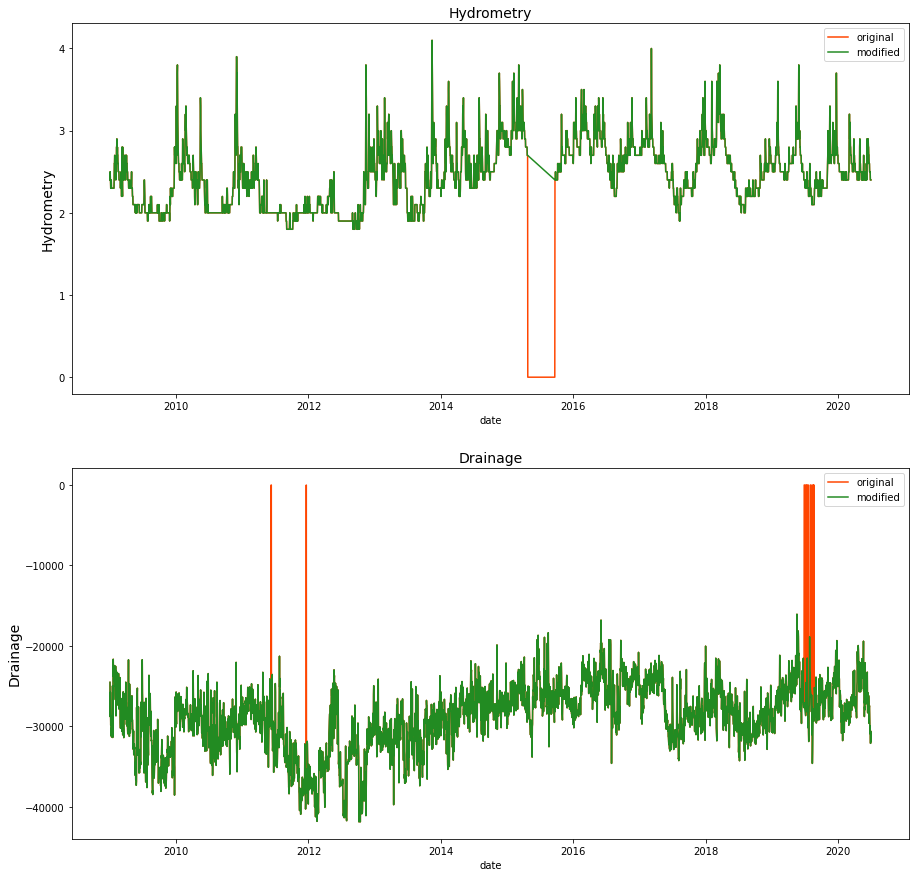

In [15]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_hydrometry = df['hydrometry'].copy()
df['hydrometry'] = df['hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='orangered', label='original')
sns.lineplot(x=df['date'], y=df['hydrometry'].fillna(np.inf), ax=ax[0], color='forestgreen', label='modified')
ax[0].set_title('Hydrometry', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

old_drainage = df['volume'].copy()
df['volume'] = df['volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1], color='orangered', label='original')
sns.lineplot(x=df['date'], y=df['volume'].fillna(np.inf), ax=ax[1], color='forestgreen', label='modified')
ax[1].set_title('Drainage', fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)

Now, we have a few options on how we can fill up the Nan values we have created, or already existed.

1) Fill NaN with mean value

2) Fill NaN with previous value (using forward fill)

3) Fill NaN through linear interpolation

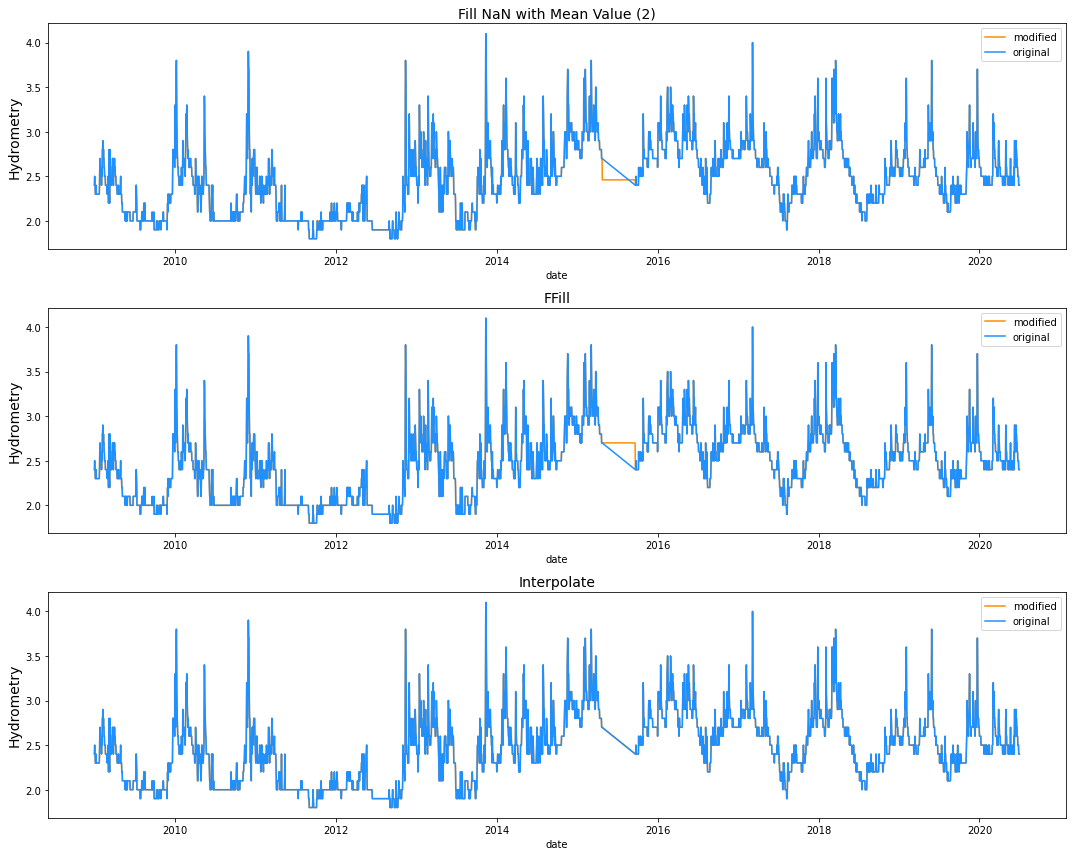

In [20]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

mean_hydrometry = df['hydrometry'].mean()
sns.lineplot(x=df['date'], y=df['hydrometry'].fillna(mean_hydrometry), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['hydrometry'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title(f'Fill NaN with Mean Value ({mean_hydrometry:.0f})', fontsize=14)
ax[0].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df['date'], y=df['hydrometry'].ffill(), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['hydrometry'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'FFill', fontsize=14)
ax[1].set_ylabel(ylabel='Hydrometry', fontsize=14)

sns.lineplot(x=df['date'], y=df['hydrometry'].interpolate(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['hydrometry'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'Interpolate', fontsize=14)
ax[2].set_ylabel(ylabel='Hydrometry', fontsize=14)

plt.tight_layout()
plt.show()

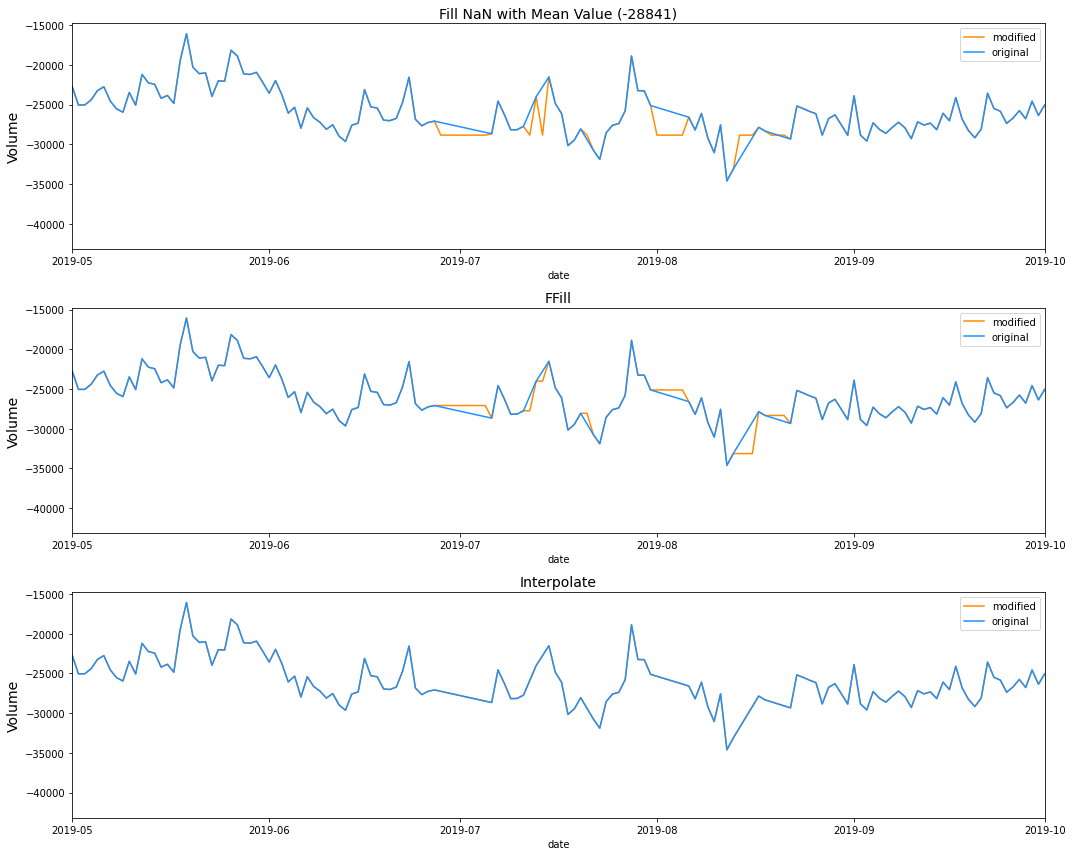

In [18]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))

mean_drainage = df['volume'].mean()
sns.lineplot(x=df['date'], y=df['volume'].fillna(mean_drainage), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['volume'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[0].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df['date'], y=df['volume'].ffill(), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['volume'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'FFill', fontsize=14)
ax[1].set_ylabel(ylabel='Volume', fontsize=14)

sns.lineplot(x=df['date'], y=df['volume'].interpolate(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['volume'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'Interpolate', fontsize=14)
ax[2].set_ylabel(ylabel='Volume', fontsize=14)

for i in range(3):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])

plt.tight_layout()
plt.show()

As seen from the above plots, interpolating would give the most accurate depiction of how the time-series would look like, hence we will interpolate our NaN values.

In [21]:
df['volume'] = df['volume'].interpolate()
df['hydrometry'] = df['hydrometry'].interpolate()
df['depth_p25'] = df['depth_p25'].interpolate()
df.isna().sum()

date          0
rainfall      0
depth_p25     0
temp_umbra    0
volume        0
hydrometry    0
dtype: int64